<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preambles" data-toc-modified-id="Preambles-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preambles</a></span></li><li><span><a href="#Static-Hamiltonian" data-toc-modified-id="Static-Hamiltonian-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Static Hamiltonian</a></span><ul class="toc-item"><li><span><a href="#Direct-coupling" data-toc-modified-id="Direct-coupling-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Direct coupling</a></span></li><li><span><a href="#Coupling-via-resonator" data-toc-modified-id="Coupling-via-resonator-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Coupling via resonator</a></span></li></ul></li><li><span><a href="#Dynamical-Hamiltonian" data-toc-modified-id="Dynamical-Hamiltonian-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Dynamical Hamiltonian</a></span><ul class="toc-item"><li><span><a href="#Check-Rabi-flopping" data-toc-modified-id="Check-Rabi-flopping-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Check Rabi flopping</a></span></li><li><span><a href="#Check-ZZ-rate-at-specific-drive-frequency" data-toc-modified-id="Check-ZZ-rate-at-specific-drive-frequency-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Check ZZ rate at specific drive frequency</a></span></li></ul></li><li><span><a href="#Sweep-parameters,-find-ZZ-rates" data-toc-modified-id="Sweep-parameters,-find-ZZ-rates-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Sweep parameters, find ZZ rates</a></span><ul class="toc-item"><li><span><a href="#Sweep-frequency-for-fixed-coupling" data-toc-modified-id="Sweep-frequency-for-fixed-coupling-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Sweep frequency for fixed coupling</a></span></li></ul></li></ul></div>

# Preambles

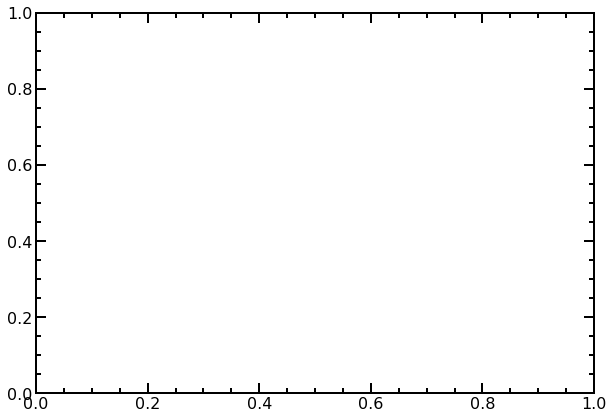

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from qutip import*
from scipy.special import eval_hermite as hpoly
import sys
sys.path.append('/Users/longnguyen/Documents/GitHub/Fluxonium_berkeley/')
from Fluxonium_hamiltonians import Single_small_junction as fluxonium
from Fluxonium_hamiltonians import qchard_pshapes as pshapes
from Fluxonium_hamiltonians import qchard_evolgates as gates
from Fluxonium_hamiltonians import qchard_transmon as transmon
from Fluxonium_hamiltonians import qchard_resonator as resonator
from Fluxonium_hamiltonians import qchard_coupobj as coupobj

import plotting_settings
import scipy.linalg
from scipy.optimize import minimize

# Static Hamiltonian

## Direct coupling

In [2]:
# fc =  5708080963.273871
# ft = 5866316190.06295
# ac = 5461514983.015043 -   5708080963.273871
# at =  5622724739.855821 -  5866316190.06295
# fr = 7.18
# g  =  0.003449
# g = 0.0037

omega1 =  5708080963.273871*1e-9 #GHz
omega2 = 5866316190.06295*1e-9
omega3 = 5.46
omega4 = 5.63
alpha1 = (5461514983.015043 -   5708080963.273871)*1e-9
alpha2 = (5622724739.855821 -  5866316190.06295)*1e-9
alpha3 = -0.270
alpha4 = -0.267
nlev = 3
qubit1 = transmon.TransmonSimple(omega_q = omega1, alpha = alpha1, nlev = nlev)
qubit2 = transmon.TransmonSimple(omega_q = omega2, alpha = alpha2, nlev = nlev)
qubit3 = transmon.TransmonSimple(omega_q = omega3, alpha = alpha3, nlev = nlev)
qubit4 = transmon.TransmonSimple(omega_q = omega4, alpha = alpha4, nlev = nlev)
g = 0.003449 #GHz
coupling_type = 'JC-rwa'
system = coupobj.CoupledObjects(qubit1, qubit2,
                                    [qubit1, qubit2, g, coupling_type])

In [3]:
# Check static ZZ rates
energies_coupled = system.levels(eigvecs=False)
vec00 = system.eigvec('00')
vec01 = system.eigvec('01')
vec10 = system.eigvec('10')
vec11 = system.eigvec('11')

zeta_11 = energies_coupled[system.level_label('11')] + energies_coupled[system.level_label('00')] \
          - energies_coupled[system.level_label('01')]- energies_coupled[system.level_label('10')]

zeta_12 = energies_coupled[system.level_label('12')] + energies_coupled[system.level_label('00')] \
          - energies_coupled[system.level_label('10')]- energies_coupled[system.level_label('02')]

zeta_21 = energies_coupled[system.level_label('21')] + energies_coupled[system.level_label('00')] \
          - energies_coupled[system.level_label('01')]- energies_coupled[system.level_label('20')]

zeta_22 = energies_coupled[system.level_label('22')] + energies_coupled[system.level_label('00')] \
          - energies_coupled[system.level_label('02')]- energies_coupled[system.level_label('20')]

print (zeta_11*1e6)
print (zeta_12*1e6)
print (zeta_21*1e6)
print (zeta_22*1e6)

336.35808684007173
647.3441666621227
-310.9860798211628
336.35808683918356


## Coupling via resonator

In [4]:
g = 0.07167103001987443
omega_c = 7.18 # Resonator freq
g0 = g #Coupling between qubit 0 and resonator
g1 = g #Coupling between qubit 1 and resonator
g3 = 0 #Coupling between qubit 0 and qubit 1
coupl_resonator= resonator.Cavity(omega=omega_c, nlev=5)
system = coupobj.CoupledObjects(qubit1, qubit2, coupl_resonator,
                               [qubit1, coupl_resonator, g0, 'JC-rwa'],
                               [qubit2, coupl_resonator, g1, 'JC-rwa'],
                               [qubit1, qubit2, g3, 'JC-rwa'])

energies_coupled = system.levels(eigvecs=False)
vec00 = system.eigvec('000')
vec01 = system.eigvec('010')
vec10 = system.eigvec('100')
vec11 = system.eigvec('110')

zeta_11 = energies_coupled[system.level_label('110')] + energies_coupled[system.level_label('000')] \
          - energies_coupled[system.level_label('010')]- energies_coupled[system.level_label('100')]

zeta_12 = energies_coupled[system.level_label('120')] + energies_coupled[system.level_label('000')] \
          - energies_coupled[system.level_label('100')]- energies_coupled[system.level_label('020')]

zeta_21 = energies_coupled[system.level_label('210')] + energies_coupled[system.level_label('000')] \
          - energies_coupled[system.level_label('010')]- energies_coupled[system.level_label('200')]

zeta_22 = energies_coupled[system.level_label('220')] + energies_coupled[system.level_label('000')] \
          - energies_coupled[system.level_label('020')]- energies_coupled[system.level_label('200')]

print (zeta_11*1e6)
print (zeta_12*1e6)
print (zeta_21*1e6)
print (zeta_22*1e6)


320.5521229379116
568.372045956167
-302.9420503342095
250.20441666256943


In [5]:
# Optimize coupling terms to fit 
from scipy.optimize import minimize
def infidel_target(x):
    g0 = x[0]
    g1 = x[1]
    g3 = x[2]
    coupl_resonator = resonator.Cavity(omega=omega_c, nlev=5)
    system = coupobj.CoupledObjects(qubit1, qubit2, coupl_resonator,
                                   [qubit1, coupl_resonator, g0, 'JC-rwa'],
                                   [qubit2, coupl_resonator, g1, 'JC-rwa'],
                                   [qubit1, qubit2, g3, 'JC-rwa'])

    energies_coupled = system.levels(eigvecs=False)

    zeta_11 = energies_coupled[system.level_label('110')] + energies_coupled[system.level_label('000')] \
              - energies_coupled[system.level_label('010')]- energies_coupled[system.level_label('100')]

    zeta_12 = energies_coupled[system.level_label('120')] + energies_coupled[system.level_label('000')] \
              - energies_coupled[system.level_label('100')]- energies_coupled[system.level_label('020')]

    zeta_21 = energies_coupled[system.level_label('210')] + energies_coupled[system.level_label('000')] \
              - energies_coupled[system.level_label('010')]- energies_coupled[system.level_label('200')]

    zeta_22 = energies_coupled[system.level_label('220')] + energies_coupled[system.level_label('000')] \
              - energies_coupled[system.level_label('020')]- energies_coupled[system.level_label('200')]
    
    cost = (zeta_11*1e6 - 333)**2 + (zeta_12*1e6 - 739)**2 + (zeta_21*1e6 + 233)**2 + (zeta_22*1e6 - 968)**2
    return cost

x0 = [g, g, 0]
xopt = minimize(infidel_target, x0, method ='Powell', tol = None)

print ('Error=', infidel_target(xopt.x))
print (xopt.x)

Error= 197749.56757498143
[-0.30027546  0.00589276 -0.00400426]


In [6]:
#Check 
omega_c = 7.18
g0 = 0.10550891
g1 = 0.09417386
g3 = 0.00296102
coupl_resonator= resonator.Cavity(omega=omega_c, nlev=3)
system = coupobj.CoupledObjects(qubit1, qubit2, coupl_resonator,
                               [qubit1, coupl_resonator, g0, 'JC-rwa'],
                               [qubit2, coupl_resonator, g1, 'JC-rwa'],
                               [qubit1, qubit2, g3, 'JC-rwa'])

energies_coupled = system.levels(eigvecs=False)
vec00 = system.eigvec('000')
vec01 = system.eigvec('010')
vec10 = system.eigvec('100')
vec11 = system.eigvec('110')

zeta_11 = energies_coupled[system.level_label('110')] + energies_coupled[system.level_label('000')] \
          - energies_coupled[system.level_label('010')]- energies_coupled[system.level_label('100')]

zeta_12 = energies_coupled[system.level_label('120')] + energies_coupled[system.level_label('000')] \
          - energies_coupled[system.level_label('100')]- energies_coupled[system.level_label('020')]

zeta_21 = energies_coupled[system.level_label('210')] + energies_coupled[system.level_label('000')] \
          - energies_coupled[system.level_label('010')]- energies_coupled[system.level_label('200')]

zeta_22 = energies_coupled[system.level_label('220')] + energies_coupled[system.level_label('000')] \
          - energies_coupled[system.level_label('020')]- energies_coupled[system.level_label('200')]

print (zeta_11*1e6)
print (zeta_12*1e6)
print (zeta_21*1e6)
print (zeta_22*1e6)

356.1949475106019
587.2050718735977
-345.8857188167741
227.3170549198511


In [7]:
#Put all together
omega1 =  5708080963.273871*1e-9 #GHz
omega2 = 5866316190.06295*1e-9
alpha1 = (5461514983.015043 -   5708080963.273871)*1e-9
alpha2 = (5622724739.855821 -  5866316190.06295)*1e-9
qubit1 = transmon.TransmonSimple(omega_q = omega1, alpha = alpha1, nlev = 4)
qubit2 = transmon.TransmonSimple(omega_q = omega2, alpha = alpha2, nlev = 4)

omega_c = 7.18
g0 = 0.10550891
g1 = 0.09417386
g3 = 0.00296102

coupl_resonator= resonator.Cavity(omega=omega_c, nlev=3)
system = coupobj.CoupledObjects(qubit1, qubit2, coupl_resonator,
                               [qubit1, coupl_resonator, g0, 'JC-rwa'],
                               [qubit2, coupl_resonator, g1, 'JC-rwa'],
                               [qubit1, qubit2, g3, 'JC-rwa'])

energies_coupled = system.levels(eigvecs=False)
vec00 = system.eigvec('000')
vec01 = system.eigvec('010')
vec10 = system.eigvec('100')
vec11 = system.eigvec('110')

zeta_11 = energies_coupled[system.level_label('110')] + energies_coupled[system.level_label('000')] \
          - energies_coupled[system.level_label('010')]- energies_coupled[system.level_label('100')]

zeta_12 = energies_coupled[system.level_label('120')] + energies_coupled[system.level_label('000')] \
          - energies_coupled[system.level_label('100')]- energies_coupled[system.level_label('020')]

zeta_21 = energies_coupled[system.level_label('210')] + energies_coupled[system.level_label('000')] \
          - energies_coupled[system.level_label('010')]- energies_coupled[system.level_label('200')]

zeta_22 = energies_coupled[system.level_label('220')] + energies_coupled[system.level_label('000')] \
          - energies_coupled[system.level_label('020')]- energies_coupled[system.level_label('200')]

print (zeta_11*1e6)
print (zeta_12*1e6)
print (zeta_21*1e6)
print (zeta_22*1e6)

356.1949475106019
716.3918636230449
-249.964223630883
974.2151163898427


# Dynamical Hamiltonian

In [8]:
from scipy.optimize import curve_fit
def line_func(x,slope,c1,c2):
    return slope*(x-c1)+c2

def cos_func(x,amp,freq,c1,c2):
    return amp*np.cos(2*np.pi*freq*(x-c1))+c2
#Here, find the frequencies of relevant transitions
freq_00_10 = system.freq('000', '100')
freq_00_01 = system.freq('000', '010')
freq_00_11 = system.freq('000', '110')
freq_01_02 = system.freq('010', '020')
freq_10_20 = system.freq('100', '200')

vec00 = system.eigvec('000')
vec01 = system.eigvec('010')
vec10 = system.eigvec('100')
vec11 = system.eigvec('110')

vec12 = system.eigvec('120')
vec21 = system.eigvec('210')
vec22 = system.eigvec('220')
vec20 = system.eigvec('200')
vec02 = system.eigvec('020')


In [9]:
#Direct coupling case
freq_00_10 = system.freq('00', '10')
freq_00_01 = system.freq('00', '01')
freq_00_11 = system.freq('00', '11')
freq_01_02 = system.freq('01', '02')
freq_10_20 = system.freq('10', '20')

vec00 = system.eigvec('00')
vec01 = system.eigvec('01')
vec10 = system.eigvec('10')
vec11 = system.eigvec('11')

vec12 = system.eigvec('12')
vec21 = system.eigvec('21')
vec22 = system.eigvec('22')
vec20 = system.eigvec('20')
vec02 = system.eigvec('02')

Exception: Unrecognized state label.

## Check Rabi flopping

In [58]:
# Gate parameters
coupl1 = 30 #MHz
coupl2 = coupl1*0.2
coupl_const1 = coupl1*1e-3*2*np.pi
coupl_const2 = coupl2*1e-3*2*np.pi
drive_freq = freq_00_01
print (drive_freq)
H_drive = coupl_const1*(system.a(0) + system.a(0).dag())   + coupl_const2*(system.a(1) +system.a(1).dag())

#Pulse
T_start = 0
T_gate = 500
shape = 'square'
sigma = 0.25
T_rise = 50
drag = False
drag_coeff = 0.3
t_points = np.linspace(0,T_gate, 2*int(T_gate)+1)

# #Using propagator
# H_dum = tensor(qeye(2), qeye(2))
U_t = gates.evolution_operator_microwave_nonorm(system.H(), H_drive, t_points=t_points, DRAG = drag, DRAG_coefficient = drag_coeff,
        T_gate=T_gate, shape=shape, sigma=sigma, T_rise = T_rise, omega_d=drive_freq)

5.859729016330836


0.01601458714807346


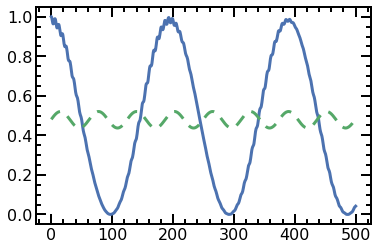

In [59]:
P_00 = expect(vec00*vec00.dag(), U_t * vec00)
plt.plot (t_points, P_00)

guess = [0.5, coupl*1e-3, 0,0]
opt, cov = curve_fit(cos_func, xdata = t_points, ydata = P_00, p0 = guess)
plt.plot(t_points, cos_func(t_points, *opt), '--')
print (opt[1])

## Check ZZ rate at specific drive frequency

-4.533696510246419


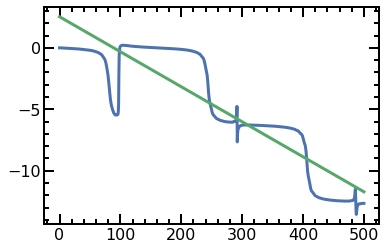

In [60]:
phase_evol = np.zeros_like(t_points)
for tind in range(len(t_points)):
    u00 = U_t[tind].matrix_element(vec00.dag(), vec00)
    u01 = U_t[tind].matrix_element(vec01.dag(), vec01)
    u10 = U_t[tind].matrix_element(vec10.dag(), vec10)
    u11 = U_t[tind].matrix_element(vec11.dag(), vec11)
    phase_evol[tind] = np.angle(u11 * u00 / (u10 * u01))

plt.plot(t_points, np.unwrap(phase_evol))
slope_guess = (phase_evol[-1]-phase_evol[0])/(t_points[-1]-t_points[0])
guess = [slope_guess,0,0]
opt, cov = curve_fit(line_func,xdata = t_points, ydata=np.unwrap(phase_evol), p0=guess)
zeta_ZZ = opt[0]/(2*np.pi)*1e3
print (zeta_ZZ)
plt.plot(t_points, line_func(t_points,*opt))

# Sweep parameters, find ZZ rates

## Sweep frequency for fixed coupling

In [71]:
drive_freq_array = np.linspace(5.35, 5.9, 101)
alpha_11 = np.zeros_like(drive_freq_array)
alpha_12 = np.zeros_like(drive_freq_array)
alpha_21 = np.zeros_like(drive_freq_array)
alpha_22 = np.zeros_like(drive_freq_array)
alpha_err_11 = np.zeros_like(drive_freq_array)
alpha_err_12 = np.zeros_like(drive_freq_array)
alpha_err_21 = np.zeros_like(drive_freq_array)
alpha_err_22 = np.zeros_like(drive_freq_array)

T_gate = 500
t_points = np.linspace(0,T_gate, 2*int(T_gate)+1)
phase_evol_11 = np.zeros_like(t_points)
phase_evol_12 = np.zeros_like(t_points)
phase_evol_21 = np.zeros_like(t_points)
phase_evol_22 = np.zeros_like(t_points)


coupl = 17 #MHz
coupl_const = coupl*1e-3*2*np.pi
H_drive = coupl_const*(system.a(0) + system.a(0).dag()   + system.a(1) +system.a(1).dag())

for drive_idx, drive_freq in enumerate(drive_freq_array):
    U_t = gates.evolution_operator_microwave_nonorm(system.H(), H_drive, t_points=t_points, DRAG = drag, DRAG_coefficient = drag_coeff,
        T_gate=T_gate, shape=shape, sigma=sigma, T_rise = T_rise, omega_d=drive_freq)
    
    for tind in range(len(t_points)):
        u00 = U_t[tind].matrix_element(vec00.dag(), vec00)
        u01 = U_t[tind].matrix_element(vec01.dag(), vec01)
        u10 = U_t[tind].matrix_element(vec10.dag(), vec10)
        u11 = U_t[tind].matrix_element(vec11.dag(), vec11)
        u21 = U_t[tind].matrix_element(vec21.dag(), vec21)
        u12 = U_t[tind].matrix_element(vec12.dag(), vec12)
        u02 = U_t[tind].matrix_element(vec02.dag(), vec02)
        u20 = U_t[tind].matrix_element(vec20.dag(), vec20)
        u22 = U_t[tind].matrix_element(vec22.dag(), vec22)
        phase_evol_11[tind] = np.angle(u11 * u00 / (u10 * u01))
        phase_evol_12[tind] = np.angle(u12 * u00 / (u10 * u02))
        phase_evol_21[tind] = np.angle(u21 * u00 / (u20 * u01))
        phase_evol_22[tind] = np.angle(u22 * u00 / (u20 * u02))
    
    #alpha_11
    slope_guess = (phase_evol_11[-1]-phase_evol_11[0])/(t_points[-1]-t_points[0])
    guess = [slope_guess,0,0]
    opt, cov = curve_fit(line_func,xdata = t_points, ydata=np.unwrap(phase_evol_11), p0=guess)
    alpha_err_11[drive_idx]=np.sqrt(np.diag(cov))[0]/(2*np.pi)*1e3
    alpha_11[drive_idx] = opt[0]/(2*np.pi)*1e3
    
    #alpha_12
    slope_guess = (phase_evol_12[-1]-phase_evol_12[0])/(t_points[-1]-t_points[0])
    guess = [slope_guess,0,0]
    opt, cov = curve_fit(line_func,xdata = t_points, ydata=np.unwrap(phase_evol_12), p0=guess)
    alpha_err_12[drive_idx]=np.sqrt(np.diag(cov))[0]/(2*np.pi)*1e3
    alpha_12[drive_idx] = opt[0]/(2*np.pi)*1e3
    
    #alpha_21
    slope_guess = (phase_evol_21[-1]-phase_evol_21[0])/(t_points[-1]-t_points[0])
    guess = [slope_guess,0,0]
    opt, cov = curve_fit(line_func,xdata = t_points, ydata=np.unwrap(phase_evol_21), p0=guess)
    alpha_err_21[drive_idx]=np.sqrt(np.diag(cov))[0]/(2*np.pi)*1e3
    alpha_21[drive_idx] = opt[0]/(2*np.pi)*1e3
    
    #alpha_22
    slope_guess = (phase_evol_22[-1]-phase_evol_22[0])/(t_points[-1]-t_points[0])
    guess = [slope_guess,0,0]
    opt, cov = curve_fit(line_func,xdata = t_points, ydata=np.unwrap(phase_evol_22), p0=guess)
    alpha_err_22[drive_idx]=np.sqrt(np.diag(cov))[0]/(2*np.pi)*1e3
    alpha_22[drive_idx] = opt[0]/(2*np.pi)*1e3
    

<ipython-input-71-a8bf791d5883>:53: RuntimeWarning: invalid value encountered in sqrt
  alpha_err_12[drive_idx]=np.sqrt(np.diag(cov))[0]/(2*np.pi)*1e3
<ipython-input-71-a8bf791d5883>:46: RuntimeWarning: invalid value encountered in sqrt
  alpha_err_11[drive_idx]=np.sqrt(np.diag(cov))[0]/(2*np.pi)*1e3
<ipython-input-71-a8bf791d5883>:60: RuntimeWarning: invalid value encountered in sqrt
  alpha_err_21[drive_idx]=np.sqrt(np.diag(cov))[0]/(2*np.pi)*1e3
<ipython-input-71-a8bf791d5883>:67: RuntimeWarning: invalid value encountered in sqrt
  alpha_err_22[drive_idx]=np.sqrt(np.diag(cov))[0]/(2*np.pi)*1e3


In [72]:
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']

([<matplotlib.axis.XTick at 0x7fd5b2c0d5e0>,
 <a list of 6 Text major ticklabel objects>)

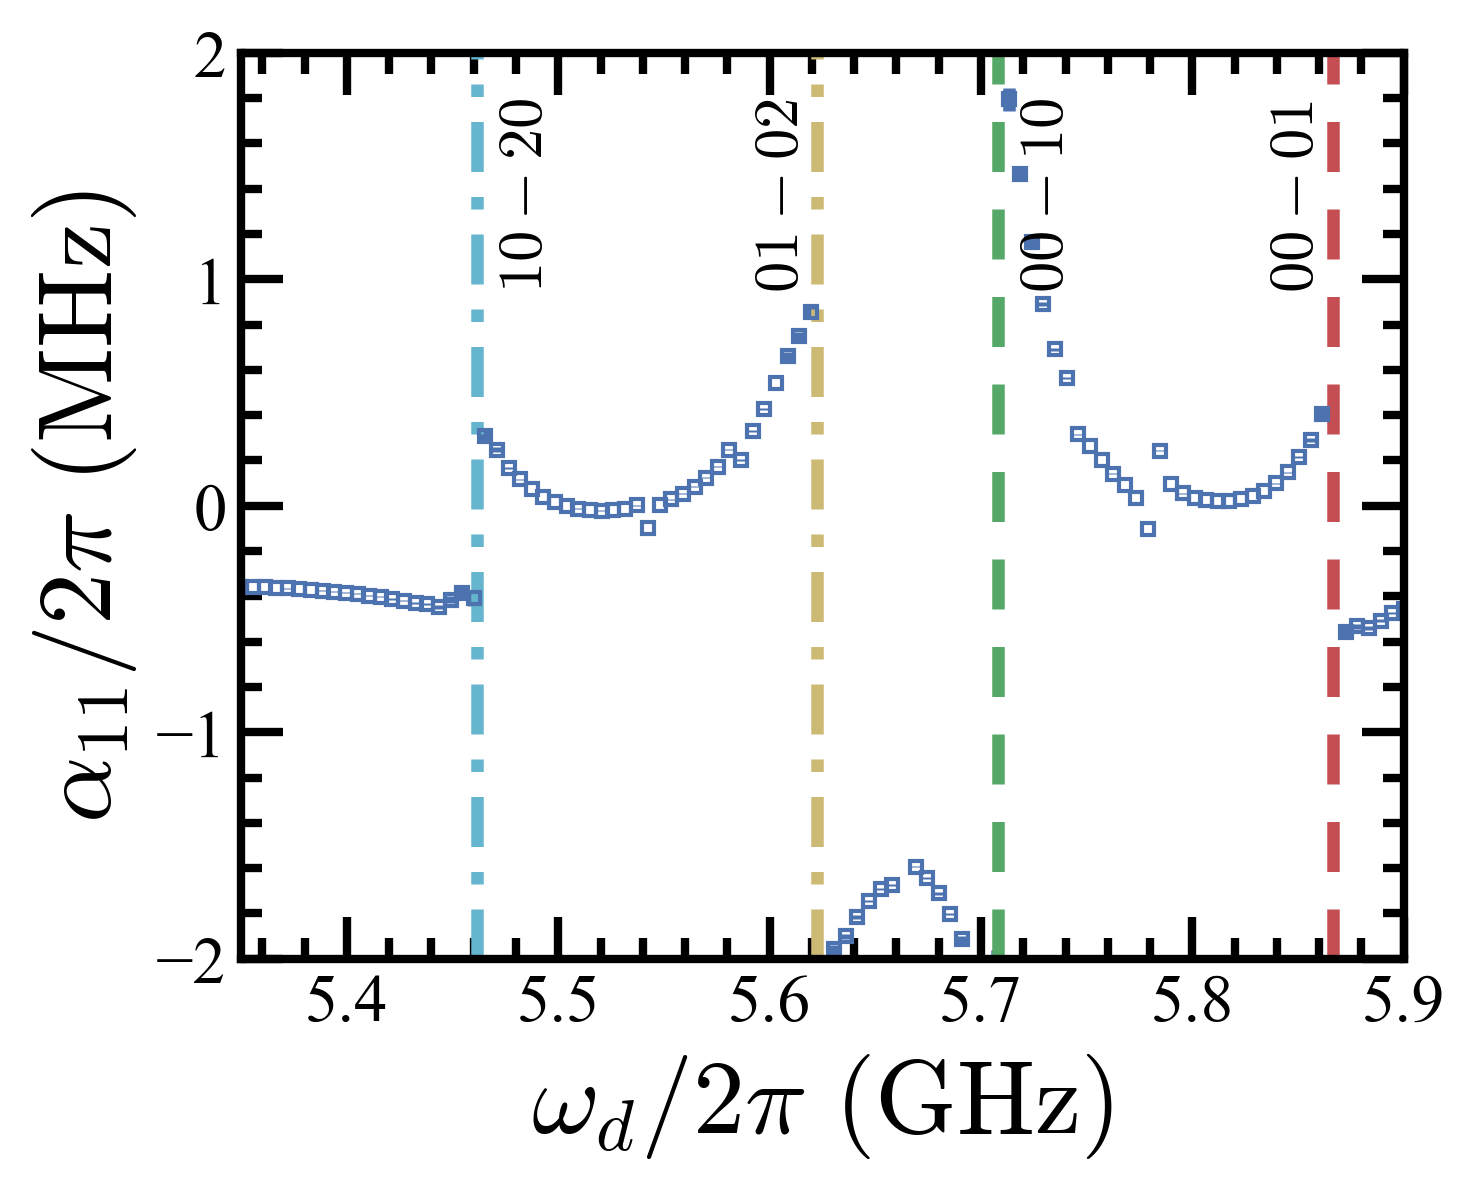

In [73]:
plt.figure(figsize = [5,4])
plt.axvline(freq_00_10, linestyle = '--', color = 'C1')
plt.text(freq_00_10+0.01,1,r'$00-10$', rotation = 90)
plt.axvline(freq_00_01, linestyle = '--', color = 'C2')
plt.text(freq_00_01-0.03,1,r'$00-01$', rotation = 90)
plt.axvline(freq_01_02, linestyle = '-.', color = 'C4')
plt.text(freq_01_02-0.03,1,r'$01-02$', rotation = 90)
plt.axvline(freq_10_20, linestyle = '-.', color = 'C5')
plt.text(freq_10_20+0.01,1,r'$10-20$', rotation = 90)

plt.errorbar(drive_freq_array, alpha_11, yerr=alpha_err_11, linestyle='none', marker='s', mfc='none', ecolor = 'C0', mec='C0', ms=3,
                 mew=1)
plt.xlabel(r'$\omega_d/2\pi~(\mathrm{GHz})$')
plt.ylabel(r'$\alpha_{11}/2\pi~(\mathrm{MHz})$')
plt.ylim([-2,2])
plt.xlim([5.35,5.9])
plt.xticks(np.linspace(5.4, 5.9, 6))


([<matplotlib.axis.XTick at 0x7fd5b572a6d0>,
 <a list of 6 Text major ticklabel objects>)

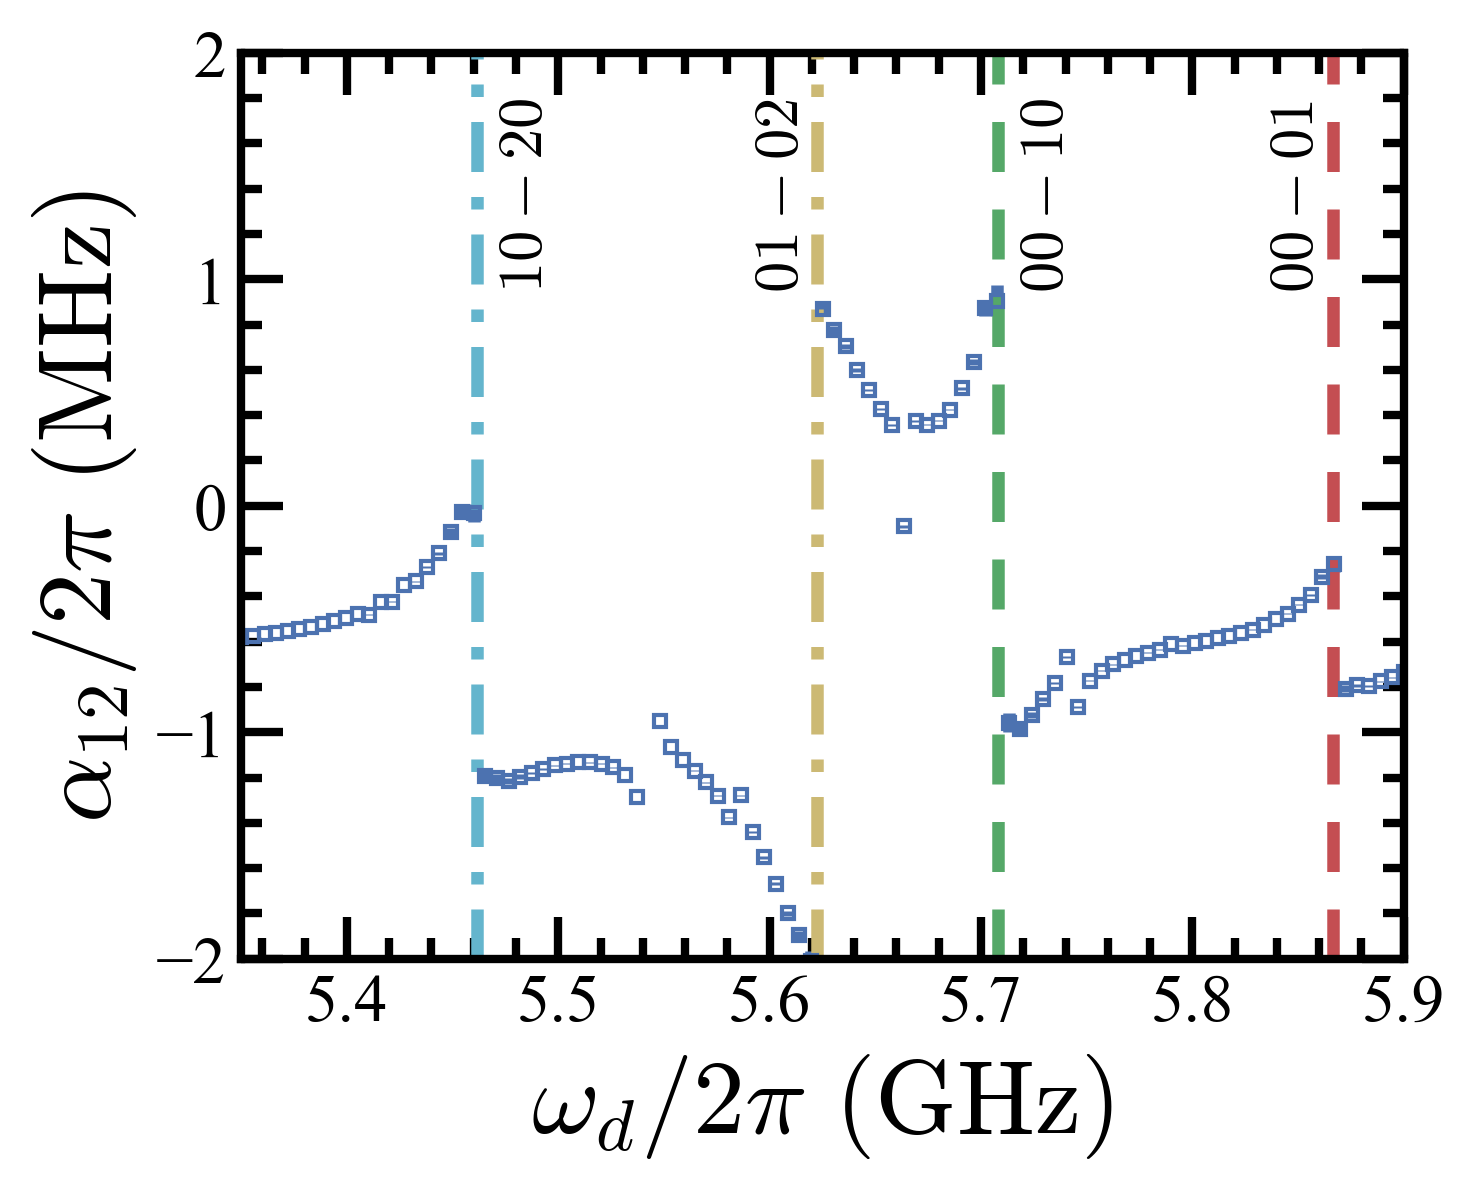

In [74]:
plt.figure(figsize = [5,4])
plt.axvline(freq_00_10, linestyle = '--', color = 'C1')
plt.text(freq_00_10+0.01,1,r'$00-10$', rotation = 90)
plt.axvline(freq_00_01, linestyle = '--', color = 'C2')
plt.text(freq_00_01-0.03,1,r'$00-01$', rotation = 90)
plt.axvline(freq_01_02, linestyle = '-.', color = 'C4')
plt.text(freq_01_02-0.03,1,r'$01-02$', rotation = 90)
plt.axvline(freq_10_20, linestyle = '-.', color = 'C5')
plt.text(freq_10_20+0.01,1,r'$10-20$', rotation = 90)

plt.errorbar(drive_freq_array, alpha_12, yerr=alpha_err_12, linestyle='none', marker='s', mfc='none', ecolor = 'C0', mec='C0', ms=3,
                 mew=1)
plt.xlabel(r'$\omega_d/2\pi~(\mathrm{GHz})$')
plt.ylabel(r'$\alpha_{12}/2\pi~(\mathrm{MHz})$')
plt.ylim([-2,2])
plt.xlim([5.35,5.9])
plt.xticks(np.linspace(5.4, 5.9, 6))

([<matplotlib.axis.XTick at 0x7fd5c2affd00>,
 <a list of 6 Text major ticklabel objects>)

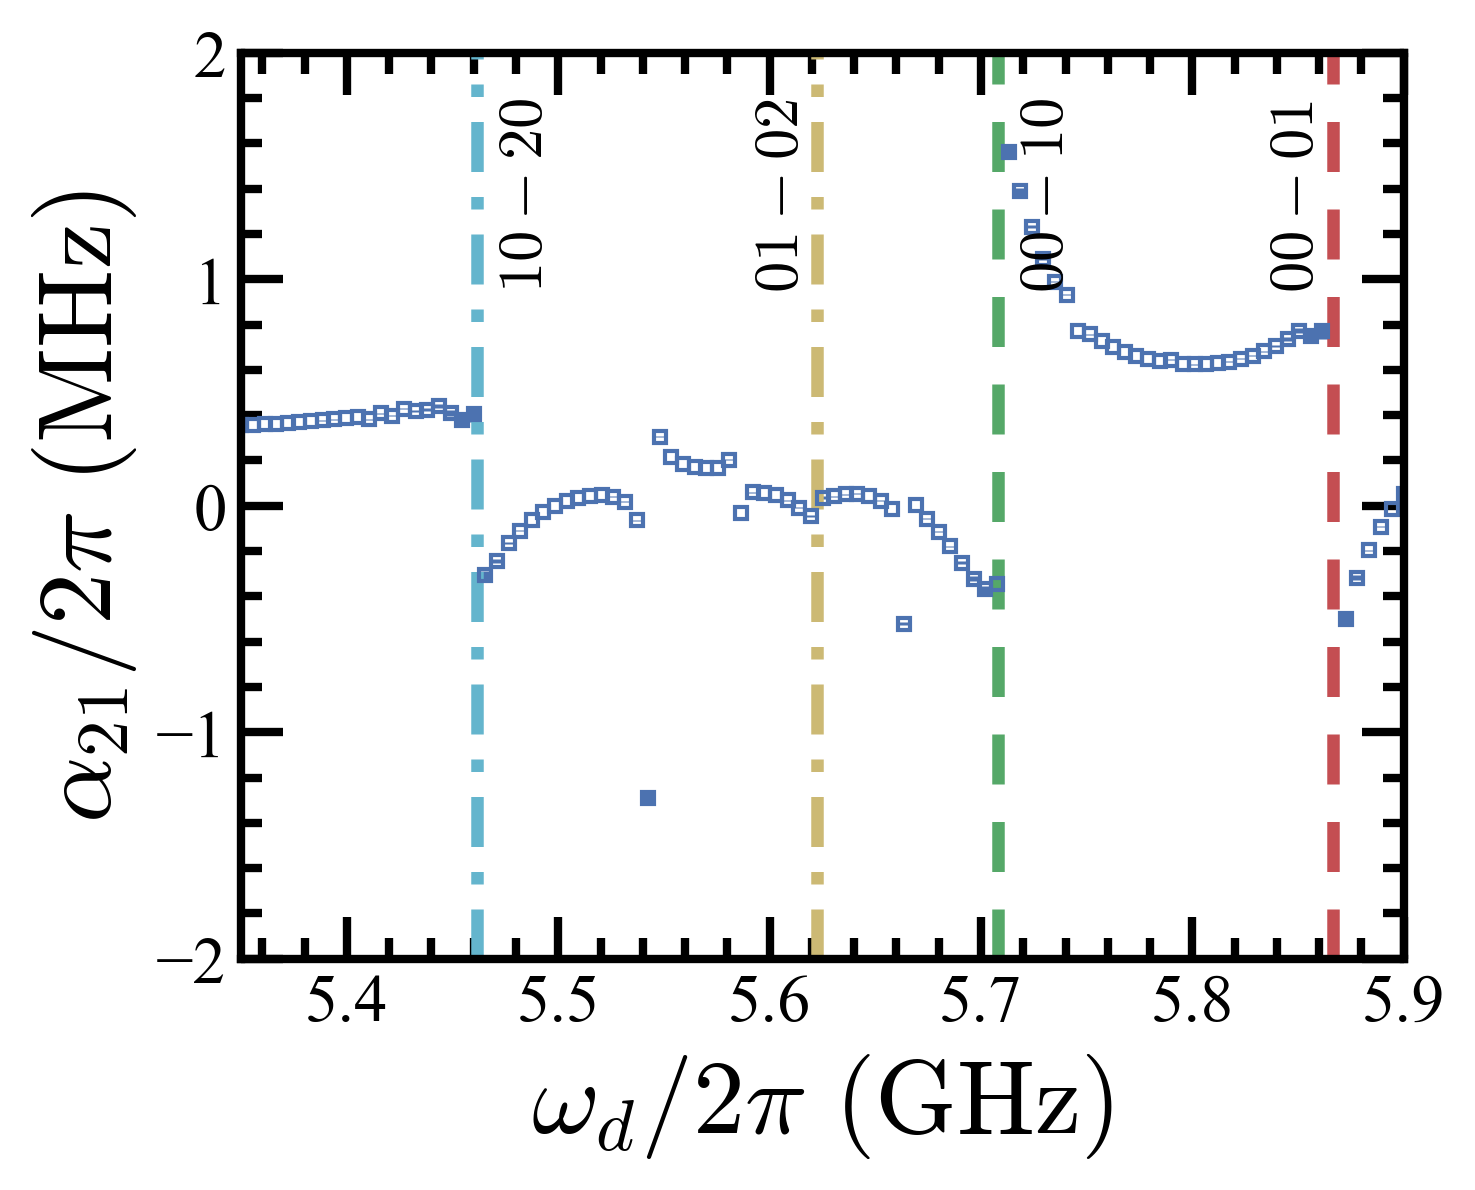

In [75]:
plt.figure(figsize = [5,4])
plt.axvline(freq_00_10, linestyle = '--', color = 'C1')
plt.text(freq_00_10+0.01,1,r'$00-10$', rotation = 90)
plt.axvline(freq_00_01, linestyle = '--', color = 'C2')
plt.text(freq_00_01-0.03,1,r'$00-01$', rotation = 90)
plt.axvline(freq_01_02, linestyle = '-.', color = 'C4')
plt.text(freq_01_02-0.03,1,r'$01-02$', rotation = 90)
plt.axvline(freq_10_20, linestyle = '-.', color = 'C5')
plt.text(freq_10_20+0.01,1,r'$10-20$', rotation = 90)

plt.errorbar(drive_freq_array, alpha_21, yerr=alpha_err_21, linestyle='none', marker='s', mfc='none', ecolor = 'C0', mec='C0', ms=3,
                 mew=1)
plt.xlabel(r'$\omega_d/2\pi~(\mathrm{GHz})$')
plt.ylabel(r'$\alpha_{21}/2\pi~(\mathrm{MHz})$')
plt.ylim([-2,2])
plt.xlim([5.35,5.9])
plt.xticks(np.linspace(5.4, 5.9, 6))

([<matplotlib.axis.XTick at 0x7fd5b5ed46a0>,
 <a list of 6 Text major ticklabel objects>)

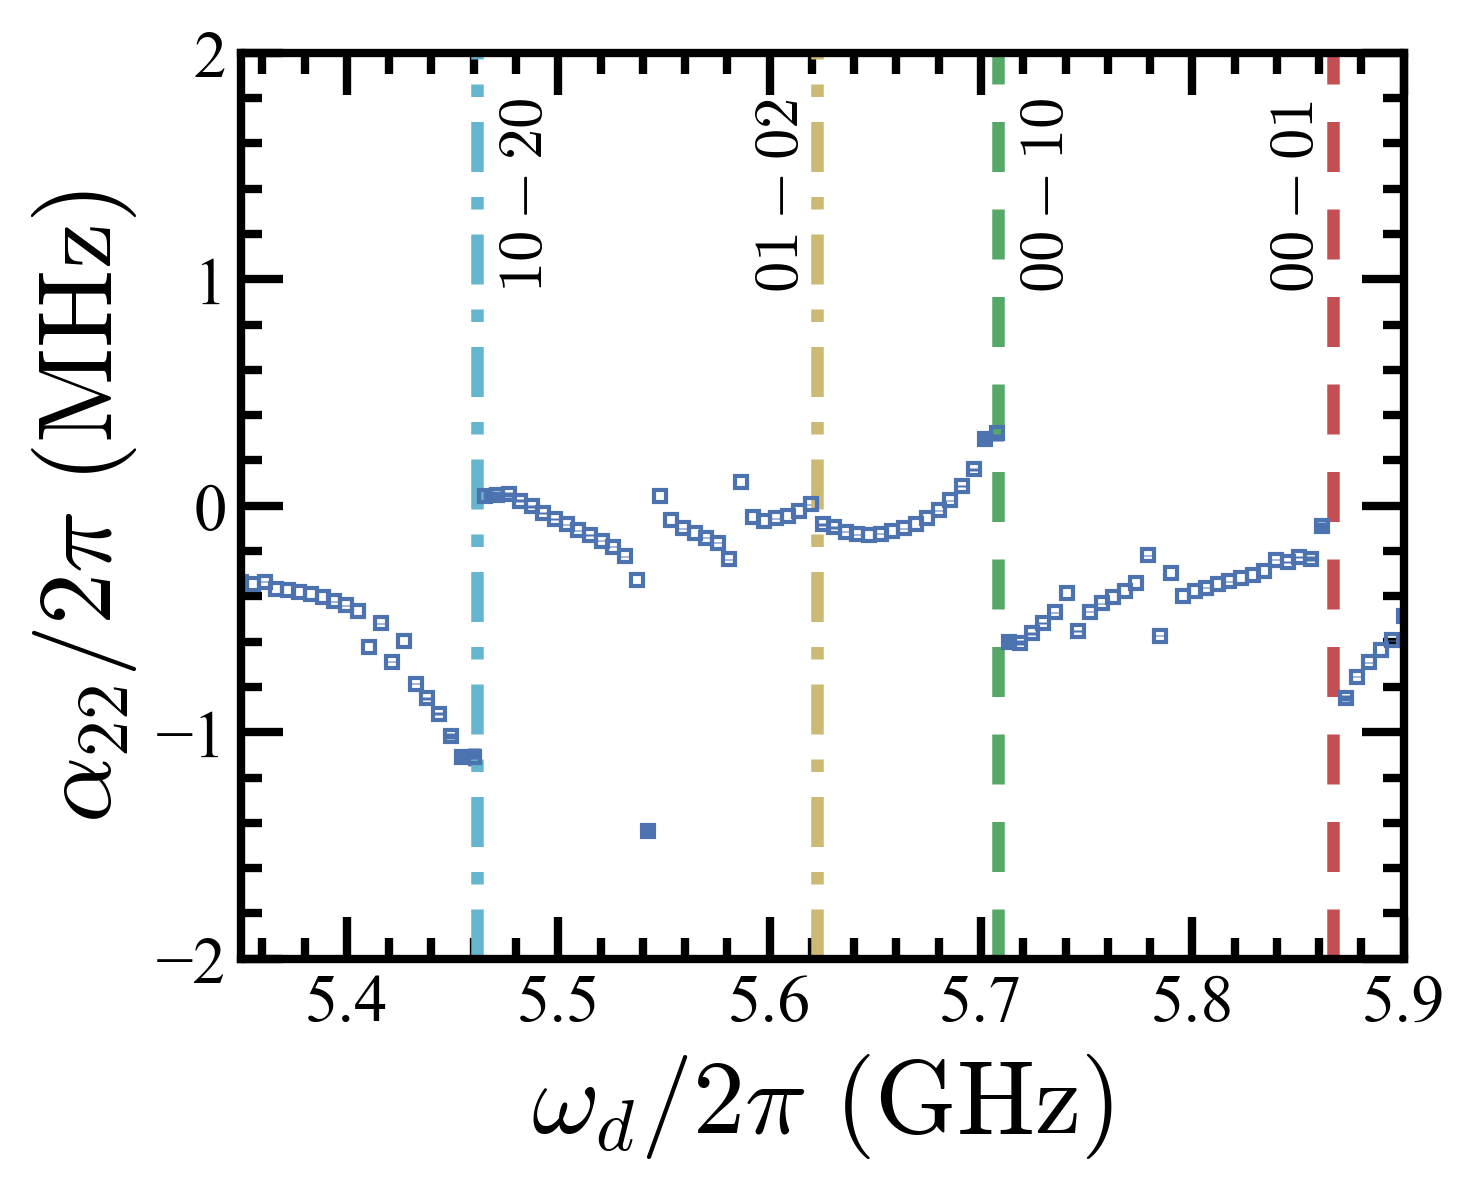

In [76]:
plt.figure(figsize = [5,4])
plt.axvline(freq_00_10, linestyle = '--', color = 'C1')
plt.text(freq_00_10+0.01,1,r'$00-10$', rotation = 90)
plt.axvline(freq_00_01, linestyle = '--', color = 'C2')
plt.text(freq_00_01-0.03,1,r'$00-01$', rotation = 90)
plt.axvline(freq_01_02, linestyle = '-.', color = 'C4')
plt.text(freq_01_02-0.03,1,r'$01-02$', rotation = 90)
plt.axvline(freq_10_20, linestyle = '-.', color = 'C5')
plt.text(freq_10_20+0.01,1,r'$10-20$', rotation = 90)

plt.errorbar(drive_freq_array, alpha_22, yerr=alpha_err_22, linestyle='none', marker='s', mfc='none', ecolor = 'C0', mec='C0', ms=3,
                 mew=1)
plt.xlabel(r'$\omega_d/2\pi~(\mathrm{GHz})$')
plt.ylabel(r'$\alpha_{22}/2\pi~(\mathrm{MHz})$')
plt.ylim([-2,2])
plt.xlim([5.35,5.9])
plt.xticks(np.linspace(5.4, 5.9, 6))